# Problem Statement:

A new car manufacturing company wants to launch cars in different categories and would like to have an idea about the price of cars based on cars specifications (in terms of various characteristics) available in market.

Task: Develop a suitable model which can help company to predict car prices.

Following points must be included in your analysis:

EDA analysis (Exploratory Data Analysis):

  Need to present complete data review with suitable charts/graphs.

Data processing steps

 Generic steps and process followed for given dataset)-

For example, if one of the missing value treatments has been applied then we would need information on other methods as well with justification as to why this method has been applied instead of others. This would be applicable for all steps (like multicollinearity, outlier, variable selection etc.) you followed in data

processing/preparation. Need justification if any Variable transformation (Bucketing, dummy variable creation) has been applied.

Assumption applied, if any.

Model Building:

Reason for selecting this model (what are the criteria you considered to finalize your model, also provide generic ranges of considered criteria.

Considered model selection criteria, also give information on criteria you have not considered but can be considered.

Results of the model using Test and Validation sample.
Submission Details:

1. You are supposed to share python code along with above mentioned details.

2. You are supposed to share test dataset along with predicted prices based upon the model built using training dataset.

3. Perform the Lazzo & Ridge Optimization model.

4. Build the various ensemble model and observe the performance.

5. Prepare a presentation or report summarizing your analysis, results, and recommendations for the retail company.
-------Relevant Information--------

1. Description:

This data set consists of three types of entities:

a. the specification of an auto in terms of various characteristics,

b. Its assigned insurance risk rating:

This corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

c. its normalized losses in use as compared to other cars:

This factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

2. Missing values are denoted by "NA"
                                 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df = pd.read_excel('cars_train.xlsx')
df.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
1,1,125.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88.0,5000.0,25,32,8189.0
2,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
3,3,194.0,nissan,gas,std,NaN,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
4,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          162 non-null    int64  
 1   normalized.losses  132 non-null    float64
 2   make               162 non-null    object 
 3   fuel.type          162 non-null    object 
 4   aspiration         162 non-null    object 
 5   num.of.doors       151 non-null    object 
 6   body.style         162 non-null    object 
 7   drive.wheels       162 non-null    object 
 8   engine.location    160 non-null    object 
 9   wheel.base         162 non-null    float64
 10  length             162 non-null    float64
 11  width              162 non-null    float64
 12  height             162 non-null    float64
 13  curb.weight        162 non-null    int64  
 14  engine.type        162 non-null    object 
 15  num.of.cylinders   160 non-null    object 
 16  engine.size        162 non

In [4]:
df.shape

(162, 26)

In [5]:
df.describe()

,symboling,normalized.losses,wheel.base,length,width,height,curb.weight,engine.size,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
count,162.000000,132.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,159.000000,159.000000,162.000000,158.000000,158.000000,162.000000,162.000000,159.000000
mean,0.907407,123.060606,98.354321,173.595062,65.843210,53.537654,2561.932099,128.160494,3.341698,3.239434,10.008704,106.000000,5116.455696,25.123457,30.679012,13182.094340
std,1.298855,36.144696,6.049384,12.339100,2.022325,2.346770,524.474870,41.684844,0.274566,0.356446,3.735804,41.489773,501.952971,6.604878,6.879309,7746.121309
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.425000,64.125000,52.000000,2151.000000,98.000000,3.150000,3.075000,8.700000,72.250000,4800.000000,19.000000,25.000000,7603.000000
50%,1.000000,116.500000,96.500000,172.400000,65.450000,53.700000,2419.500000,120.000000,3.330000,3.270000,9.000000,95.000000,5100.000000,24.000000,30.000000,10795.000000
75%,2.000000,150.000000,101.200000,181.650000,66.575000,55.500000,2975.750000,146.000000,3.605000,3.460000,9.400000,121.000000,5500.000000,30.000000,34.000000,16594.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.100000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,41315.000000


In [6]:
df.isna().sum()

symboling             0
normalized.losses    30
make                  0
fuel.type             0
aspiration            0
num.of.doors         11
body.style            0
drive.wheels          0
engine.location       2
wheel.base            0
length                0
width                 0
height                0
curb.weight           0
engine.type           0
num.of.cylinders      2
engine.size           0
fuel.system           0
bore                  3
stroke                3
compression.ratio     0
horsepower            4
peak.rpm              4
city.mpg              0
highway.mpg           0
Car_Price             3
dtype: int64

In [7]:
df = df.fillna(method = 'bfill')
df.isna().sum()

symboling            0
normalized.losses    0
make                 0
fuel.type            0
aspiration           0
num.of.doors         0
body.style           0
drive.wheels         0
engine.location      0
wheel.base           0
length               0
width                0
height               0
curb.weight          0
engine.type          0
num.of.cylinders     0
engine.size          0
fuel.system          0
bore                 0
stroke               0
compression.ratio    0
horsepower           0
peak.rpm             0
city.mpg             0
highway.mpg          0
Car_Price            0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['make'] = le.fit_transform(df['make'])
df['fuel.type'] = le.fit_transform(df['fuel.type'])
df['aspiration'] = le.fit_transform(df['aspiration'])
df['num.of.doors'] = le.fit_transform(df['num.of.doors'])
df['body.style'] = le.fit_transform(df['body.style'])
df['drive.wheels'] = le.fit_transform(df['drive.wheels'])
df['engine.location'] = le.fit_transform(df['engine.location'])
df['fuel.system'] = le.fit_transform(df['fuel.system'])
df['engine.type'] = le.fit_transform(df['engine.type'])
df['num.of.cylinders'] = le.fit_transform(df['num.of.cylinders'])
df.head()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
0,1,129.0,8,1,0,1,2,1,0,98.8,...,122,1,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
1,1,125.0,10,1,0,0,3,1,0,96.3,...,122,1,3.35,3.46,8.5,88.0,5000.0,25,32,8189.0
2,3,150.0,8,1,0,1,2,2,0,95.3,...,70,2,3.43,3.27,9.4,101.0,6000.0,17,23,13645.0
3,3,194.0,11,1,0,0,2,2,0,91.3,...,181,5,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
4,0,85.0,5,1,0,0,3,1,0,96.5,...,110,5,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0


In [9]:
df.corr()

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,Car_Price
symboling,1.000000,0.475287,-0.077937,0.181603,-0.022238,0.582157,-0.611864,-0.048645,0.180686,-0.539268,...,-0.049741,0.044981,-0.056732,0.021962,-0.171719,0.125595,0.216238,-0.060925,0.011946,-0.060502
normalized.losses,0.475287,1.000000,-0.183867,0.020349,0.088036,0.289628,-0.205213,0.343285,-0.006953,-0.033953,...,0.140499,0.281753,0.058407,0.112659,-0.044625,0.262289,0.165372,-0.227256,-0.187033,0.124639
make,-0.077937,-0.183867,1.000000,-0.050428,0.021969,-0.063124,0.042936,-0.009837,0.043834,0.098615,...,-0.060970,0.151270,0.275213,-0.266902,0.068085,-0.062550,-0.183841,-0.003460,-0.008609,-0.134744
fuel.type,0.181603,0.020349,-0.050428,1.000000,-0.355113,0.101934,-0.162951,-0.159604,0.034387,-0.353862,...,-0.090269,0.041322,-0.067847,-0.225377,-0.982026,0.149399,0.420301,-0.221112,-0.152140,-0.138562
aspiration,-0.022238,0.088036,0.021969,-0.355113,1.000000,0.025227,0.022632,0.097618,-0.047760,0.286006,...,0.156656,0.263800,0.253873,0.242868,0.233911,0.255399,-0.152599,-0.254541,-0.298924,0.209392
num.of.doors,0.582157,0.289628,-0.063124,0.101934,0.025227,1.000000,-0.599790,-0.037282,0.123449,-0.398820,...,-0.046190,0.007198,-0.073966,0.026188,-0.093359,0.096829,0.197673,0.003745,0.035153,-0.051528
body.style,-0.611864,-0.205213,0.042936,-0.162951,0.022632,-0.599790,1.000000,-0.074358,-0.273961,0.421829,...,-0.073211,-0.070778,-0.018460,-0.061979,0.156914,-0.172709,-0.110219,0.074752,0.029924,-0.087122
drive.wheels,-0.048645,0.343285,-0.009837,-0.159604,0.097618,-0.037282,-0.074358,1.000000,0.129223,0.449206,...,0.523112,0.449322,0.409865,0.100681,0.156070,0.486709,-0.008219,-0.469826,-0.479440,0.607846
engine.location,0.180686,-0.006953,0.043834,0.034387,-0.047760,0.123449,-0.273961,0.129223,1.000000,-0.164151,...,0.177136,0.095590,0.162976,-0.107953,-0.015271,0.273278,0.174027,-0.137935,-0.092582,0.325254
wheel.base,-0.539268,-0.033953,0.098615,-0.353862,0.286006,-0.398820,0.421829,0.449206,-0.164151,1.000000,...,0.490241,0.375547,0.419877,0.099309,0.295181,0.249932,-0.360354,-0.425518,-0.502093,0.519205


array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'normalized.losses'}>,
        <Axes: title={'center': 'make'}>,
        <Axes: title={'center': 'fuel.type'}>,
        <Axes: title={'center': 'aspiration'}>],
       [<Axes: title={'center': 'num.of.doors'}>,
        <Axes: title={'center': 'body.style'}>,
        <Axes: title={'center': 'drive.wheels'}>,
        <Axes: title={'center': 'engine.location'}>,
        <Axes: title={'center': 'wheel.base'}>],
       [<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb.weight'}>,
        <Axes: title={'center': 'engine.type'}>],
       [<Axes: title={'center': 'num.of.cylinders'}>,
        <Axes: title={'center': 'engine.size'}>,
        <Axes: title={'center': 'fuel.system'}>,
        <Axes: title={'center': 'bore'}>,
        <Axes: title={'center': 'stroke'}>],
       [<Axes: title={'center': 'compress

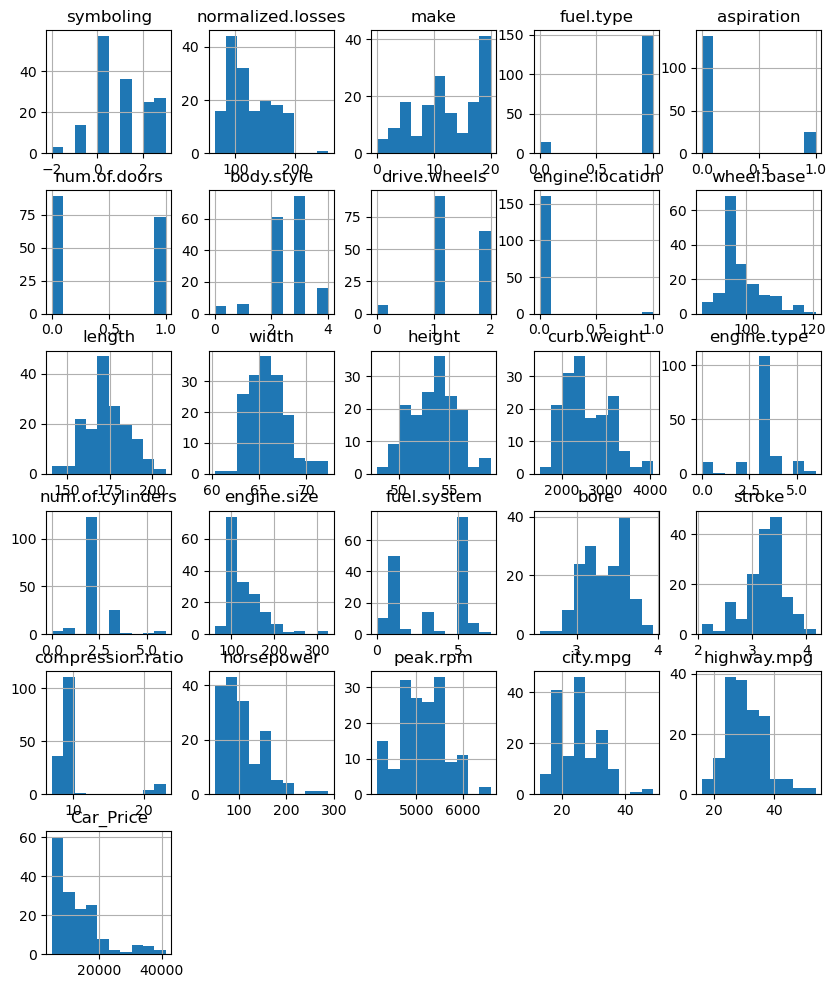

In [28]:
df.hist(figsize=(10,12))

<Axes: >

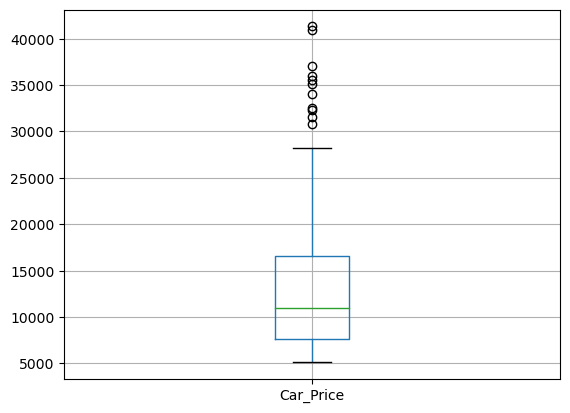

In [12]:
df.boxplot('Car_Price')

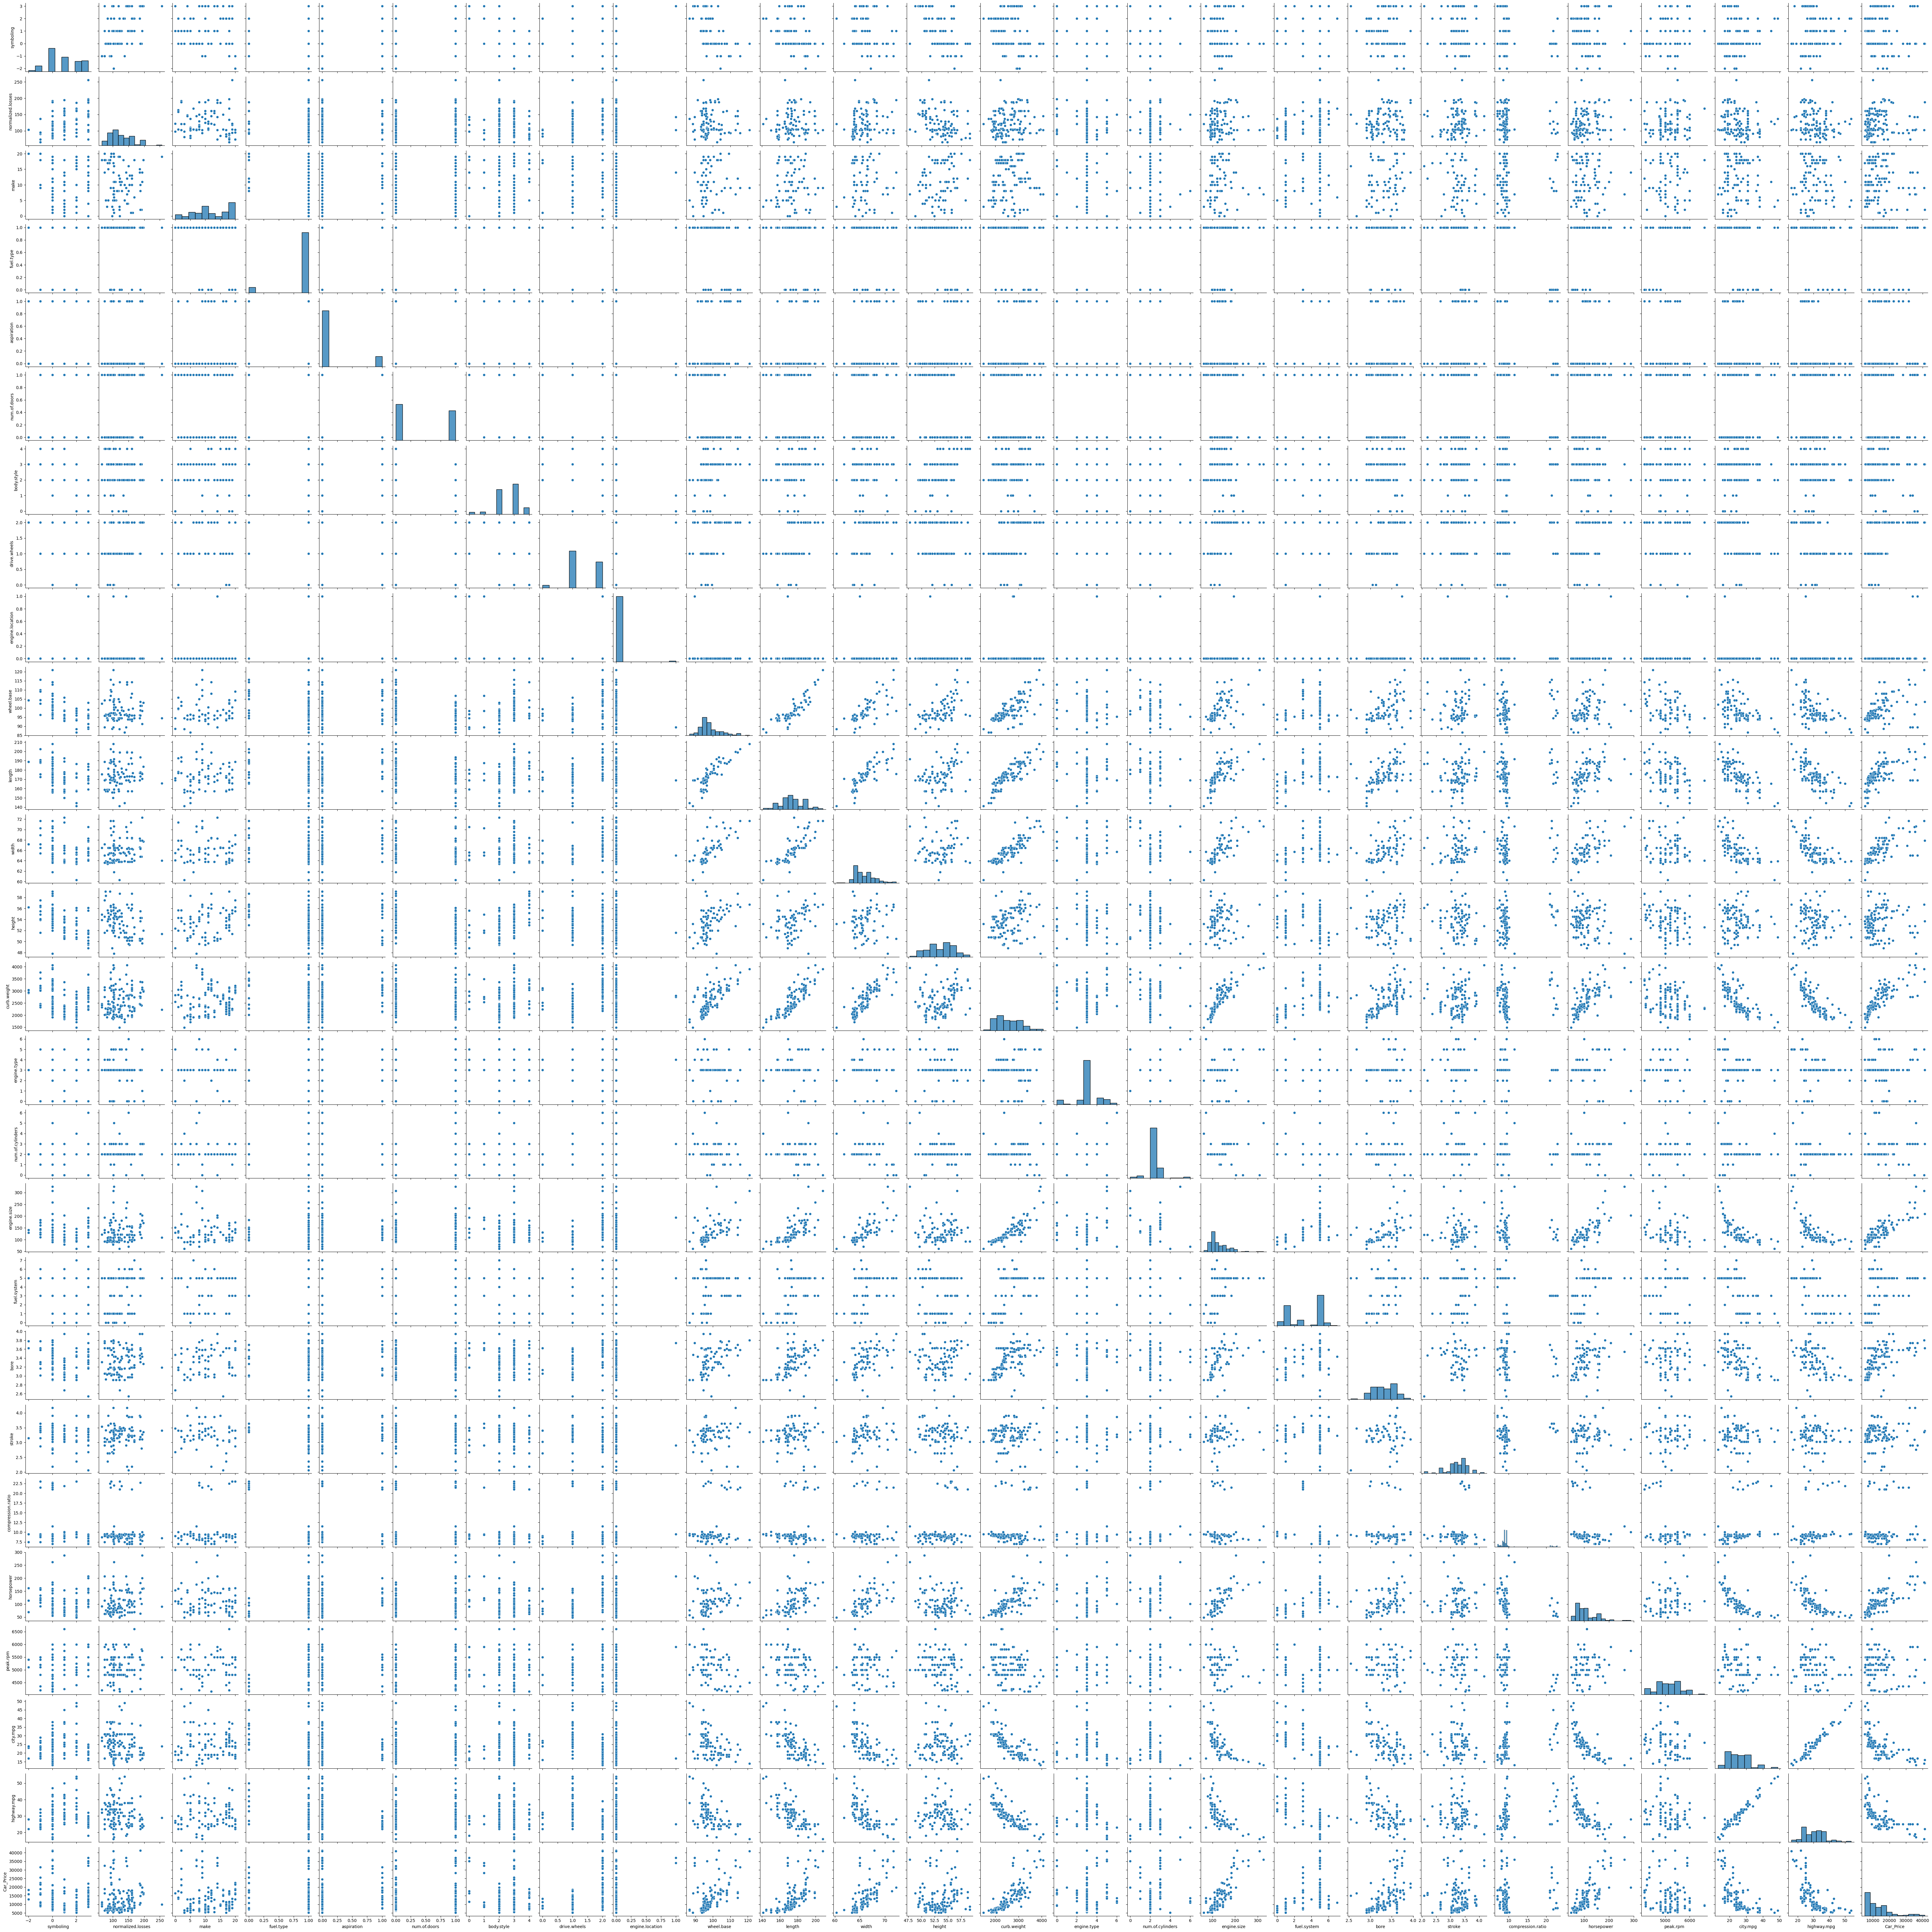

In [13]:
sns.pairplot(df)

<Axes: xlabel='Car_Price', ylabel='count'>

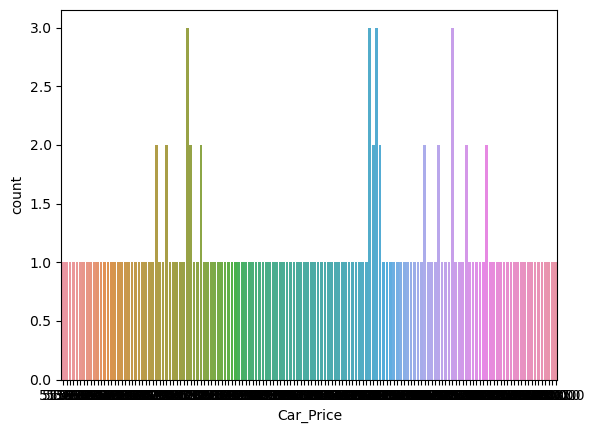

In [14]:
sns.countplot(x='Car_Price', data = df)

<Axes: >

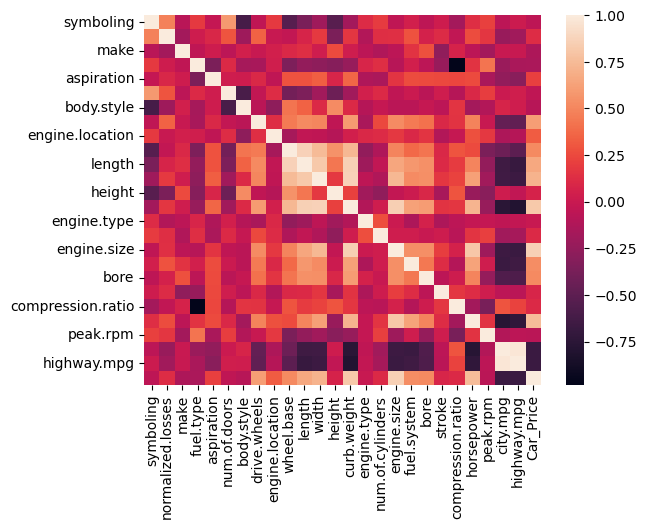

In [15]:
sns.heatmap(df.corr())

In [16]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
print('*************************LinearRegression****************************\n')
print('Training started.........\n')
lin_reg.fit(X_train, Y_train)
print('Hyperparameter:\n', lin_reg.get_params())
print('\nTraining completed........!\n')
print()
print('Testing started.........\n')
y_pred_lin_reg = lin_reg.predict(X_test)
print('Predicted class labels are: \n', y_pred_lin_reg)
print('\nTesting completed........!\n')
print('Performance measures:')
print('Mean Squared Error:\t',mean_squared_error(Y_test,y_pred_lin_reg))
print('RMSE:\t',np.sqrt(mean_squared_error(Y_test,y_pred_lin_reg)))
print('R-Square value:\t',r2_score(Y_test,y_pred_lin_reg))

*************************LinearRegression****************************

Training started.........

Hyperparameter:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Training completed........!


Testing started.........

Predicted class labels are: 
 [[12122.24515825]
 [26917.85280644]
 [ 6839.34555104]
 [20698.23159168]
 [14360.74074546]
 [16170.44736536]
 [28215.91926071]
 [17638.44241784]
 [19602.0365878 ]
 [ 7780.81408386]
 [34741.41993991]
 [ 8559.09456746]
 [20689.19965329]
 [  829.75449648]
 [15559.26080147]
 [12354.01150413]
 [ 9384.70041206]
 [ 9209.59347253]
 [ 6648.44705927]
 [ 5792.10542966]
 [ 3854.80526867]
 [ 7265.4686857 ]
 [13029.15659676]
 [11708.43376208]
 [18319.85897452]
 [ 5909.75221338]
 [17448.08025544]
 [18064.22240754]
 [26527.3667279 ]
 [12263.89604751]
 [31796.21265981]
 [24027.88469798]
 [10410.86275697]]

Testing completed........!

Performance measures:
Mean Squared Error:	 17810703.591848087
RMSE:	 4220.272928596927
R-Square val

In [19]:
from sklearn.linear_model import Lasso

# Lasso Regression Model
lasso_model = Lasso(alpha=0.01)
print('*************************Lasso Regression****************************\n')
print('Training started.........\n')
lasso_model.fit(X_train, Y_train)
print('Hyperparameter:\n', lin_reg.get_params())
print('\nTraining completed........!\n')
print()
print('Testing started.........\n')
lasso_predictions = lasso_model.predict(X_test)
print('Predicted class labels are: \n', lasso_predictions)
print('\nTesting completed........!\n')
print('Performance measures:')
print('Mean Squared Error:\t',mean_squared_error(Y_test,lasso_predictions))
print('RMSE:\t',np.sqrt(mean_squared_error(Y_test,lasso_predictions)))
print('R-Square value:\t',r2_score(Y_test,lasso_predictions))

*************************Lasso Regression****************************

Training started.........

Hyperparameter:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Training completed........!


Testing started.........

Predicted class labels are: 
 [12122.14117017 26917.69298247  6839.19849237 20698.61221217
 14360.44772703 16170.9578877  28215.24608578 17638.15804162
 19601.28507713  7780.90083797 34740.11984761  8559.13053895
 20689.49932466   829.64226482 15559.59890499 12354.13363345
  9384.53396157  9209.46184627  6648.48726855  5792.39745185
  3854.85854172  7265.30074365 13029.11451002 11708.35814276
 18319.26179998  5909.98196537 17447.81787807 18065.32254436
 26527.25925538 12264.39530645 31796.50914621 24027.6151084
 10411.14346472]

Testing completed........!

Performance measures:
Mean Squared Error:	 17810613.429932125
RMSE:	 4220.262246582803
R-Square value:	 0.8279748288773336


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.110e+08, tolerance: 5.847e+05
  model = cd_fast.enet_coordinate_descent(


In [20]:
from sklearn.linear_model import Ridge

# Ridge Regression Model
ridge_model = Ridge(alpha=0.01)
print('*************************Ridge Regression****************************\n')
print('Training started.........\n')
ridge_model.fit(X_train, Y_train)
print('Hyperparameter:\n', ridge_model.get_params())
print('\nTraining completed........!\n')
print()
print('Testing started.........\n')
ridge_predictions = ridge_model.predict(X_test)
print('Predicted class labels are: \n', ridge_predictions)
print('\nTesting completed........!\n')
print('Performance measures:')
print('Mean Squared Error:\t',mean_squared_error(Y_test,ridge_predictions))
print('RMSE:\t',np.sqrt(mean_squared_error(Y_test,ridge_predictions)))
print('R-Square value:\t',r2_score(Y_test,ridge_predictions))

*************************Ridge Regression****************************

Training started.........

Hyperparameter:
 {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}

Training completed........!


Testing started.........

Predicted class labels are: 
 [[12129.24739952]
 [26914.39311408]
 [ 6837.07489265]
 [20706.3102243 ]
 [14357.11735964]
 [16180.66852612]
 [28222.90197379]
 [17632.81823311]
 [19603.41238055]
 [ 7782.03182125]
 [34654.11371796]
 [ 8554.06561081]
 [20697.04274016]
 [  820.57460548]
 [15565.7678117 ]
 [12357.32261502]
 [ 9387.43842941]
 [ 9207.1527488 ]
 [ 6649.33234112]
 [ 5794.94802355]
 [ 3850.10805884]
 [ 7263.56545782]
 [13026.98193462]
 [11709.76037871]
 [18309.00688982]
 [ 5908.26568955]
 [17449.96205821]
 [18072.38967921]
 [26522.83706053]
 [12271.39075598]
 [31804.68078266]
 [24025.68728751]
 [10416.01763587]]

Testing completed........!

Performance measures:
Mean 

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression Model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=10)
print('*************************Random Forest Regression****************************\n')
print('Training started.........\n')
random_forest_model.fit(X_train, Y_train.values.ravel())
print('Hyperparameter:\n', random_forest_model.get_params())
print('\nTraining completed........!\n')
print()
print('Testing started.........\n')
random_forest_predictions = random_forest_model.predict(X_test)
print('Predicted class labels are: \n', random_forest_predictions)
print('\nTesting completed........!\n')
print('Performance measures:')
print('Mean Squared Error:\t',mean_squared_error(Y_test,random_forest_predictions))
print('RMSE:\t',np.sqrt(mean_squared_error(Y_test,random_forest_predictions)))
print('R-Square value:\t',r2_score(Y_test,random_forest_predictions))

*************************Random Forest Regression****************************

Training started.........

Hyperparameter:
 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}

Training completed........!


Testing started.........

Predicted class labels are: 
 [10039.3   34665.47   8006.93  16144.745 10423.555 17099.89  34851.86
 17436.62  13087.29   7169.92  32067.69  10292.07  16085.815  6666.56
 15172.76  12719.91   9523.45   8819.49   7773.14   7720.01   6305.58
  7252.78  13547.61   8712.7   16053.85   6510.01  17334.41  17493.48
 34842.82  14204.13  31727.62  31815.42  12886.54 ]

Testing completed........!

Performance measures:
Mean Squared Error:	 7326297.572

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regression Model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=10)
print('*************************Gradient Boosting Regression****************************\n')
print('Training started.........\n')
gradient_boosting_model.fit(X_train, Y_train.values.ravel())
print('Hyperparameter:\n', gradient_boosting_model.get_params())
print('\nTraining completed........!\n')
print()
print('Testing started.........\n')
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
print('Predicted class labels are: \n', gradient_boosting_predictions)
print('\nTesting completed........!\n')
print('Performance measures:')
print('Mean Squared Error:\t',mean_squared_error(Y_test,gradient_boosting_predictions))
print('RMSE:\t',np.sqrt(mean_squared_error(Y_test,gradient_boosting_predictions)))
print('R-Square value:\t',r2_score(Y_test,gradient_boosting_predictions))

*************************Gradient Boosting Regression****************************

Training started.........

Hyperparameter:
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 10, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

Training completed........!


Testing started.........

Predicted class labels are: 
 [10964.14828603 36721.56770437  8082.96104358 16220.30049636
 11467.55263746 17864.38541015 36764.51164374 20018.51588039
 15466.65453486  7281.70092317 34827.27898191 10322.16650657
 16017.13482315  6998.12266115 15112.73338528 12612.63579596
 10080.21820858  8140.91674648  5850.48562507  7140.04477493
  6264.06831911  7215.9

In [23]:
regression_scores = [('Linear Regression', mean_squared_error(Y_test, y_pred_lin_reg)),
                    ('Lasso Regression', mean_squared_error(Y_test, lasso_predictions)),
                    ('Ridge Regression', mean_squared_error(Y_test, ridge_predictions)),
                    ('Random forest Regression', mean_squared_error(Y_test, random_forest_predictions)),
                    ('Gradient Boosting Regression', mean_squared_error(Y_test, gradient_boosting_predictions))]
                    
regression_scores_df = pd.DataFrame(regression_scores, columns=['Model', 'Mean Squared Error'])
print(regression_scores_df.sort_values(by='Mean Squared Error'))

                          Model  Mean Squared Error
3      Random forest Regression        7.326298e+06
4  Gradient Boosting Regression        7.875482e+06
1              Lasso Regression        1.781061e+07
0             Linear Regression        1.781070e+07
2              Ridge Regression        1.782793e+07


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Lasso Regression'),
  Text(2, 0, 'Ridge Regression'),
  Text(3, 0, 'Random forest Regression'),
  Text(4, 0, 'Gradient Boosting Regression')])

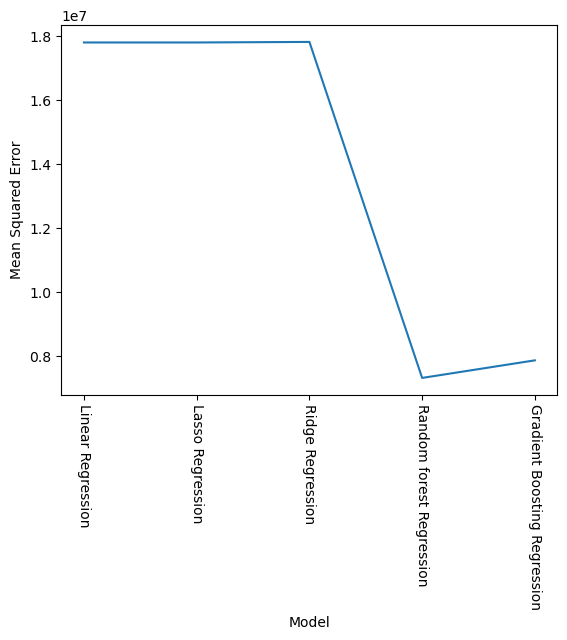

In [27]:
sns.lineplot(x=regression_scores_df['Model'], y=regression_scores_df['Mean Squared Error'], data=regression_scores_df)
plt.xticks(rotation=270)